<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n20.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.060439,59.801693,23.580025,-5.592165e-07,115.442156,115.442158,-2.027205e-06
1,0.0,1.0,39.008452,61.745974,78.414440,-1.653663e-06,189.168864,189.168863,4.486428e-07
2,0.0,2.0,75.795695,41.763605,28.588194,-9.659371e-07,156.147492,156.147493,-8.920294e-07
3,0.0,3.0,42.886128,92.290839,48.838370,9.892951e-07,194.015338,194.015339,-9.801503e-07
4,0.0,4.0,23.812004,67.095667,77.847763,1.908069e-06,178.755436,178.755432,3.614939e-06
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.254603,61.261837,62.420973,-2.054383e-06,168.937410,168.937411,-1.075410e-06
249996,999.0,246.0,29.388754,48.093895,33.886852,-2.251735e-06,121.369498,121.369500,-2.184054e-06
249997,999.0,247.0,27.565062,92.714581,42.399098,-2.754462e-07,172.678741,172.678740,1.194007e-06
249998,999.0,248.0,59.653946,87.253163,84.166860,7.269928e-07,241.073970,241.073968,1.745451e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.060439,59.801693,23.580025,-5.592165e-07,115.442156,115.442158,-2.027205e-06
1,0.0,1.0,39.008452,61.745974,78.414440,-1.653663e-06,189.168864,189.168863,4.486428e-07
2,0.0,2.0,75.795695,41.763605,28.588194,-9.659371e-07,156.147492,156.147493,-8.920294e-07
3,0.0,3.0,42.886128,92.290839,48.838370,9.892951e-07,194.015338,194.015339,-9.801503e-07
4,0.0,4.0,23.812004,67.095667,77.847763,1.908069e-06,178.755436,178.755432,3.614939e-06
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.254603,61.261837,62.420973,-2.054383e-06,168.937410,168.937411,-1.075410e-06
249996,999.0,246.0,29.388754,48.093895,33.886852,-2.251735e-06,121.369498,121.369500,-2.184054e-06
249997,999.0,247.0,27.565062,92.714581,42.399098,-2.754462e-07,172.678741,172.678740,1.194007e-06
249998,999.0,248.0,59.653946,87.253163,84.166860,7.269928e-07,241.073970,241.073968,1.745451e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    22.060439  59.801693  ...  115.442158 -2.027205e-06
      1.0    39.008452  61.745974  ...  189.168863  4.486428e-07
      2.0    75.795695  41.763605  ...  156.147493 -8.920294e-07
      3.0    42.886128  92.290839  ...  194.015339 -9.801503e-07
      4.0    23.812004  67.095667  ...  178.755432  3.614939e-06
...                ...        ...  ...         ...           ...
999.0 245.0  35.254603  61.261837  ...  168.937411 -1.075410e-06
      246.0  29.388754  48.093895  ...  121.369500 -2.184054e-06
      247.0  27.565062  92.714581  ...  172.678740  1.194007e-06
      248.0  59.653946  87.253163  ...  241.073968  1.745451e-06
      249.0  55.705568  67.572609  ...  230.557327 -9.029997e-07

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    22.060439  59.801693  ...  115.442158 -2.027205e-06
      1.0    39.008452  61.745974  ...  189.168863  4.486428e-07
      2.0    75.795695  41.763605  ...  156.147493 -8.920294e-07
      3.0    42.886128  92.290839  ...  194.015339 -9.801503e-07
      4.0    23.812004  67.095667  ...  178.755432  3.614939e-06
...                ...        ...  ...         ...           ...
999.0 245.0  35.254603  61.261837  ...  168.937411 -1.075410e-06
      246.0  29.388754  48.093895  ...  121.369500 -2.184054e-06
      247.0  27.565062  92.714581  ...  172.678740  1.194007e-06
      248.0  59.653946  87.253163  ...  241.073968  1.745451e-06
      249.0  55.705568  67.572609  ...  230.557327 -9.029997e-07

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,22.060439,59.801693,23.580025,-5.592165e-07,115.442156,115.442158,-2.027205e-06
1,0.0,1.0,39.008452,61.745974,78.414440,-1.653663e-06,189.168864,189.168863,4.486428e-07
2,0.0,2.0,75.795695,41.763605,28.588194,-9.659371e-07,156.147492,156.147493,-8.920294e-07
3,0.0,3.0,42.886128,92.290839,48.838370,9.892951e-07,194.015338,194.015339,-9.801503e-07
4,0.0,4.0,23.812004,67.095667,77.847763,1.908069e-06,178.755436,178.755432,3.614939e-06
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,35.254603,61.261837,62.420973,-2.054383e-06,168.937410,168.937411,-1.075410e-06
249996,999.0,246.0,29.388754,48.093895,33.886852,-2.251735e-06,121.369498,121.369500,-2.184054e-06
249997,999.0,247.0,27.565062,92.714581,42.399098,-2.754462e-07,172.678741,172.678740,1.194007e-06
249998,999.0,248.0,59.653946,87.253163,84.166860,7.269928e-07,241.073970,241.073968,1.745451e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    22.060439  59.801693  ...  115.442158 -2.027205e-06
      1.0    39.008452  61.745974  ...  189.168863  4.486428e-07
      2.0    75.795695  41.763605  ...  156.147493 -8.920294e-07
      3.0    42.886128  92.290839  ...  194.015339 -9.801503e-07
      4.0    23.812004  67.095667  ...  178.755432  3.614939e-06
...                ...        ...  ...         ...           ...
999.0 245.0  35.254603  61.261837  ...  168.937411 -1.075410e-06
      246.0  29.388754  48.093895  ...  121.369500 -2.184054e-06
      247.0  27.565062  92.714581  ...  172.678740  1.194007e-06
      248.0  59.653946  87.253163  ...  241.073968  1.745451e-06
      249.0  55.705568  67.572609  ...  230.557327 -9.029997e-07

[250000 rows x 7 columns]

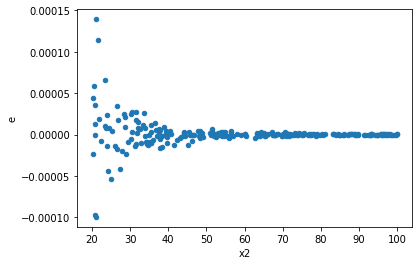

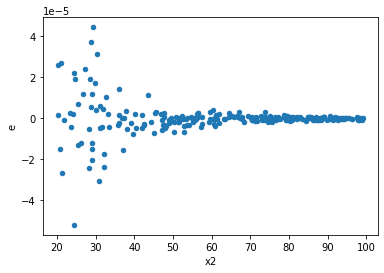

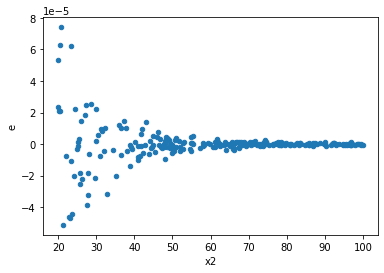

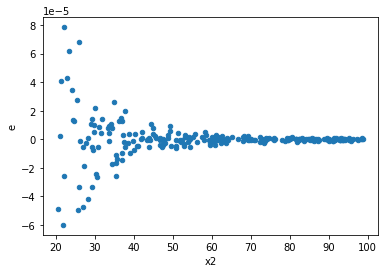

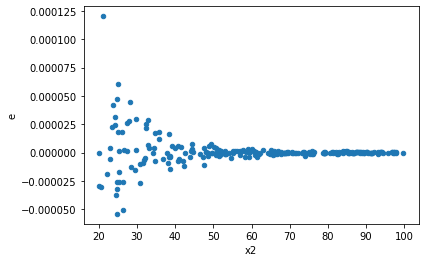

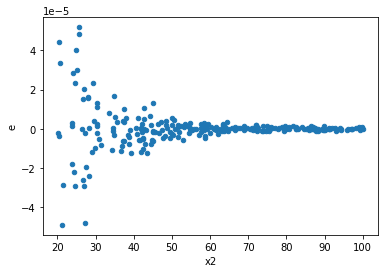

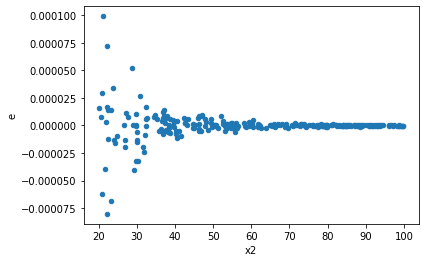

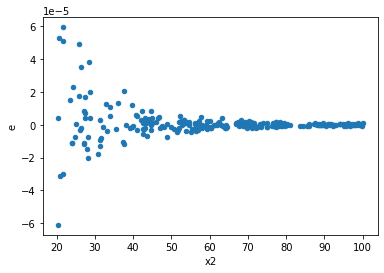

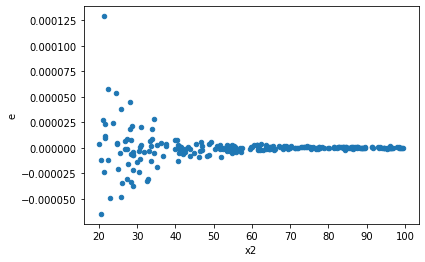

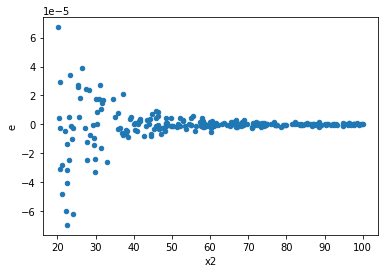

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,8.008388905775082e-11,4.017663361016828e-08,8.342071776849043e-13,4.185066001059196e-10,0.001993295153466577,1.1333831444901337e-103,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,4.90554553576481e-11,4.116476917767785e-08,5.109943266421677e-13,4.2879967893414426e-10,0.0011916854226951207,1.786593638724454e-114,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,4.565485663920407e-11,2.7834714369031644e-08,4.755714233250423e-13,2.8994494134407964e-10,0.0016402128663478854,9.169818596761183e-108,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,5.204159688409039e-11,3.686814642980663e-08,5.420999675426083e-13,3.8404319197715237e-10,0.0014115598944788976,6.449707694445596e-111,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,6.6858091327584e-11,4.420080294457784e-08,6.96438451329e-13,4.6042503067268583e-10,0.0015125990224977475,1.8262670222096009e-109,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,5.4097338918320375e-11,3.016384929161949e-08,5.635139470658372e-13,3.1420676345436966e-10,0.0017934494498800721,6.875586885909293e-106,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,5.698473778377274e-11,3.369699240927665e-08,5.93591018580966e-13,3.5101033759663177e-10,0.0016910926972843149,4.015349950074921e-107,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,8.70335945849037e-11,4.602624606910132e-08,9.065999435927469e-13,4.794400632198054e-10,0.0018909557484709085,8.88005453367965e-105,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,8.464076071194386e-11,6.159505027126304e-08,8.816745907494152e-13,6.416151069923234e-10,0.0013741487398612078,1.759146568555144e-111,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64